In [1]:
import numpy as np
import matplotlib.pyplot as plt
from algo.preprocess import Standardize
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=42)

sc = Standardize()
sc.calc(X_train)

sc_train, sc_val = sc.scale(X_train), sc.scale(X_val)

In [3]:
w = np.random.normal(loc=0., scale=0.05, size=(X.shape[1]))
b = np.random.normal(loc=0., scale=0.05, size=(1))
print(w, b)

[-2.63949543e-05 -1.37450712e-02 -6.96427808e-03  9.92343079e-02
  1.41054663e-02  3.80404329e-02  1.50490803e-02  2.70148634e-02
  1.86748644e-02  1.88906697e-02 -4.51065963e-03 -1.15297163e-01
  5.71380012e-02 -7.67827143e-02 -4.31876009e-02  5.08272468e-02
  5.16981942e-02 -4.12246114e-02  9.45242821e-04 -1.91671778e-02
 -1.52092737e-02  4.98645753e-02 -6.36369203e-03 -7.37942951e-02
 -9.70453164e-02  4.16824462e-02 -2.83608944e-02  5.87243478e-02
  1.59534416e-02  9.54352139e-03] [0.01846351]


## Gradient descent based method :

In [ ]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

def grad_descent(x, w, y_true, y_hat):
    dw = (1/len(y_true)) * np.dot(x.T, (y_hat - y_true))
    db = (1 / len(y_true) *np.sum(y_hat - y_true))
    return dw, db

def loss_func(y_true, y_hat, epsilon=1e-6):
    y_hat = np.clip(y_hat, a_min = epsilon, a_max= 1 - epsilon)
    f1 = y_true * np.log(y_hat)
    f2 = (1 - y_true ) * np.log( 1 - y_hat + epsilon) 
    f = f1 + f2
    return - np.mean(f)

def accuracy(y_true, y_hat):
    return np.sum(y_true == y_hat) / len(y_true)

def update(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

def argmaxThis(pred):
    argmaxed = []
    for i in range(len(pred)):
        if pred[i] > 0.5:
            argmaxed.append(1)
        else : 
            argmaxed.append(0)
    return argmaxed

In [4]:
def sigmoid(x):
    return 1 / ( 1 + np.exp(-x))

def grad_descent(x, w, y_true, y_hat):
    dw = (1/len(y_true)) * np.dot(x.T, (y_hat - y_true))
    db = (1 / len(y_true) *np.sum(y_hat - y_true))
    return dw, db

def loss_func(y_true, y_hat, epsilon=1e-6):
    y_hat = np.clip(y_hat, a_min = epsilon, a_max= 1 - epsilon)
    f1 = y_true * np.log(y_hat)
    f2 = (1 - y_true ) * np.log( 1 - y_hat + epsilon) 
    f = f1 + f2
    return - np.mean(f)

def accuracy(y_true, y_hat):
    return np.sum(y_true == y_hat) / len(y_true)

def update(w, b, dw, db, lr):
    w = w - lr * dw
    b = b - lr * db
    return w, b

def argmaxThis(pred):
    argmaxed = []
    for i in range(len(pred)):
        if pred[i] > 0.5:
            argmaxed.append(1)
        else : 
            argmaxed.append(0)
    return argmaxed

In [5]:
loss_hist, val_loss_hist = [], []

for _ in range(1300):
    y_hat = sigmoid(np.dot(sc_train, w) + b)
    dw, db = grad_descent(sc_train, w, y_train, y_hat)
    w, b = update(w, b, dw, db, 0.01)
    loss = loss_func(y_train, y_hat)
    val_hat = sigmoid(np.dot(sc_val, w) + b)
    val_loss = loss_func(y_val, val_hat)
    loss_hist.append(loss)
    val_loss_hist.append(val_loss)

In [7]:
train_pred = sigmoid(np.dot(sc_train, w) + b)
train_acc = accuracy(y_train, argmaxThis(train_pred))

val_pred =  sigmoid(np.dot(sc_val, w) + b)
val_acc = accuracy(y_val, argmaxThis(val_pred))

print("Train Accuracy : ", train_acc)
print("Validation Accuracy : ", val_acc)

Train Accuracy :  0.984375
Validation Accuracy :  0.9824561403508771


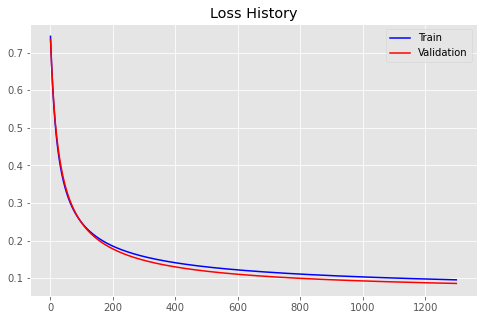

In [8]:
plt.figure(figsize=(8, 5))
plt.title("Loss History")
plt.plot(loss_hist, color='b', label='Train')
plt.plot(val_loss_hist, color='r', label='Validation')
plt.legend();